In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random


In [2]:
df = pd.read_csv("https://media.githubusercontent.com/media/pbarretoo/Challenge2022/main/Referencias/INFLUD21-18-04-2022.csv", sep=';')
df.shape 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,122,143) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1725842, 166)

In [3]:
df.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,08/01/2021,1,06/01/2021,1,SP,GVE VIII MOGI DAS CRUZES,1333.0,GUARULHOS,351880,HOSPITAL BOM CLIMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/01/2021,2,10/01/2021,2,PR,17RS LONDRINA,1371.0,LONDRINA,411370,HOSPITAL UNIVERSITARIO REGIONAL DO NORTE DO PA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13/01/2021,2,03/01/2021,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL SAO CAMILO POMPEIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/01/2021,1,04/01/2021,1,RS,006 CRS,1611.0,PASSO FUNDO,431410,HOSPITAL SAO VICENTE DE PAULO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/01/2021,2,07/01/2021,1,AM,ENTORNO DE MANAUS E RIO NEGRO,5584.0,MANAUS,130260,MATERNIDADE BALBINA MESTRINHO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Fizemos a separação da coluna de data para fazer o agrupamento na parte da análise

In [4]:
df[['DIA', 'MES', 'ANO']] = df['DT_NOTIFIC'].str.split('/', expand=True)

- Filtramos o estado de São Paulo e o ano de 2021 para conseguirmos entender os dados relacionados ao ano da criação das vacinas no estado de SP

In [5]:
df_sp = df[(df['ID_MUNICIP'] == 'SAO PAULO') & (df['ANO'] == '2021')]
df_sp.shape

(148654, 169)

Dicionário dos numeros obtidos na feature CLASSI_FIN:
1. SRAG por influenza
2. SRAG por outro vírus respiratório
3. SRAG por outro agente etiológico, qual:
4. SRAG não especificado
5. SRAG por covid-19





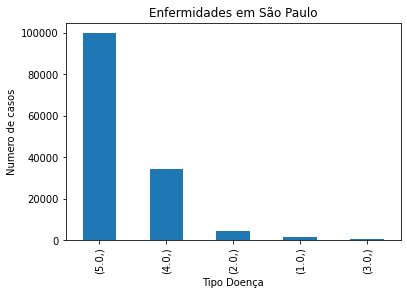

In [6]:
df_sp[['CLASSI_FIN']].value_counts().plot(kind='bar')
plt.xlabel ("Tipo Doença") 
plt. ylabel ("Numero de casos") 
plt.title ("Enfermidades em São Paulo")
plt.show()

- Verificamos a quantidade de pessoas que contrairam a enfermidade 5 (Covid)

In [7]:
df_covid_sp = df_sp[df_sp['CLASSI_FIN'] == 5]
df_covid_sp.shape

(99949, 169)

- Verificamos a porcentagem dos casos registrados em São Paulo que testaram positivo para o Covid


In [8]:
porcentagem = df_covid_sp.shape[0]/df_sp.shape[0]
print(f'A porcentagem de doenças respiratórias registradas em 2021 em São Paulo com positivo para covid é de {round((porcentagem * 100),2)}%')

A porcentagem de doenças respiratórias registradas em 2021 em São Paulo com positivo para covid é de 67.24%


- Separamos sintomas do covid para analisar qual é o mais comum

In [9]:
lista_sintomas = 'FEBRE TOSSE GARGANTA DIARREIA VOMITO FADIGA DOR_ABD'.split()

In [10]:
df_sintomas = df_covid_sp.loc[:, lista_sintomas]

In [11]:
dc_count = {}
for feature in lista_sintomas:
  dc_count[feature] = list(df_sintomas[feature].value_counts())[0]
dc_count

{'DIARREIA': 39808,
 'DOR_ABD': 41292,
 'FADIGA': 28296,
 'FEBRE': 52318,
 'GARGANTA': 37848,
 'TOSSE': 65282,
 'VOMITO': 41537}

In [12]:
df_count = pd.DataFrame(dc_count.items(), columns=['Sintoma', 'Contagem']).sort_values('Contagem', ascending=False)
df_count

,Sintoma,Contagem
1,TOSSE,65282
0,FEBRE,52318
4,VOMITO,41537
6,DOR_ABD,41292
3,DIARREIA,39808
2,GARGANTA,37848
5,FADIGA,28296


- Ao plotarmos os dados obtidos, observa-se que o sintoma mais comum é a tosse seguida da febre.

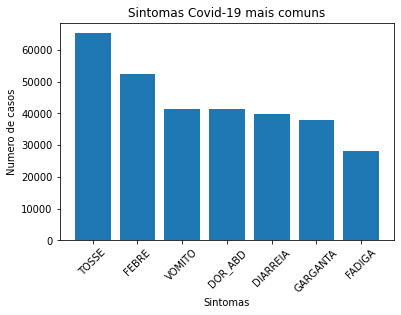

In [13]:
plt.bar(df_count['Sintoma'], df_count['Contagem'])
plt.xticks(rotation=45)
plt.xlabel ("Sintomas") 
plt. ylabel ("Numero de casos") 
plt.title ("Sintomas Covid-19 mais comuns")
plt.show()

In [14]:
df_covid_sp.shape

(99949, 169)

In [15]:
df_sp['DOSE_1_COV'].count()

24716

In [16]:
df_covid_sp['DOSE_1_COV'].count()

16273

In [17]:
df_sp['DOSE_2_COV'].count()

16589

In [18]:
df_covid_sp['DOSE_2_COV'].count()

9950

In [19]:
df_casos_mes = df_covid_sp.groupby('MES').agg(Contagem_Casos = pd.NamedAgg('CLASSI_FIN', 'count')).reset_index()

- Plotamos a contagem de casos por mes para observar se houve algum evento que afetou o numero de casos.

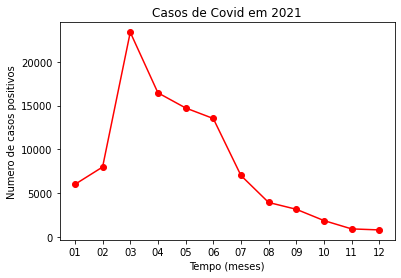

In [20]:
plt.plot(df_casos_mes['MES'], df_casos_mes['Contagem_Casos'], 'o-r')
plt.xlabel ("Tempo (meses)") 
plt. ylabel ("Numero de casos positivos") 
plt.title ("Casos de Covid em 2021")
plt.show()

- Observamos que houve um aumento considerável dos casos de covid no mes de março/Abril provavelmente devido a proximidade com o Carnaval, que mesmo sendo cancelado foi comemorado por diversos paulistanos. E nos meses seguintes houve uma baixa nos casos devido as vacinas que começaram a ser aplicadas em ampla escala.

- Fizemos a contagem dos casos de covid juntamente com a contagem de vacinados tanto da primeira quanto da segunda dose.

In [21]:
df_casos_dia = df_covid_sp.groupby(['DT_NOTIFIC']).agg(Contagem_Casos = pd.NamedAgg('CLASSI_FIN', 'count'),
                                                       Contagem_Vacinados_1 = pd.NamedAgg('DOSE_1_COV', 'count'),
                                                       Contagem_Vacinados_2 = pd.NamedAgg('DOSE_2_COV', 'count')
                                                       ).reset_index()
df_casos_dia

,DT_NOTIFIC,Contagem_Casos,Contagem_Vacinados_1,Contagem_Vacinados_2
0,01/02/2021,345,14,13
1,01/03/2021,699,49,37
2,01/04/2021,864,91,38
3,01/05/2021,231,50,25
4,01/06/2021,579,112,59
...,...,...,...,...
358,31/05/2021,806,121,57
359,31/07/2021,59,18,11
360,31/08/2021,118,44,26
361,31/10/2021,20,14,13


- Checamos a correlação das vacinas com os casos de covid

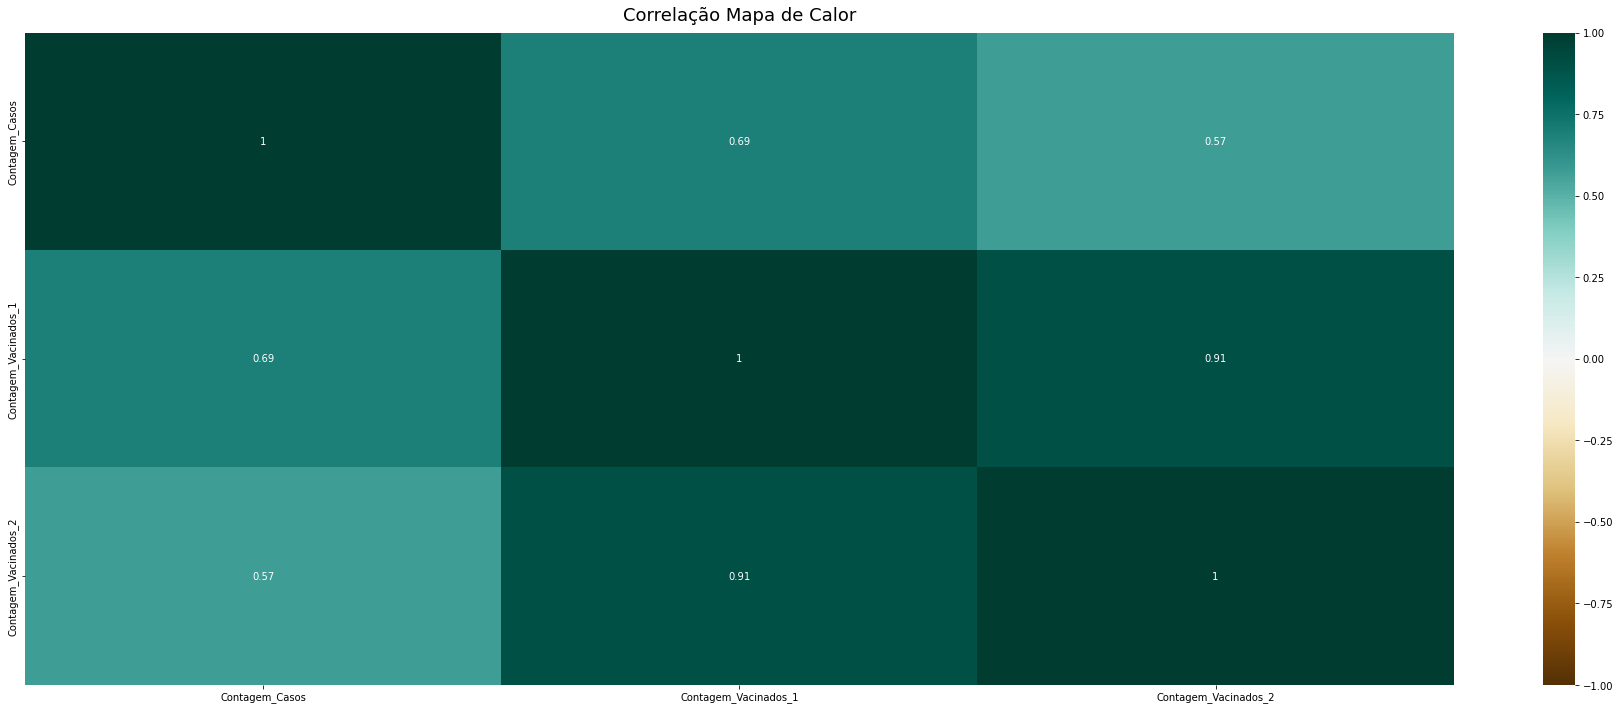

In [22]:
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(df_casos_dia.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação Mapa de Calor', fontdict={'fontsize':18}, pad=12);

# Resultados podem ser salvos para comparações
# e análises posteriores
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

- A correlação entre o covid e a primeira dose é maior do que o covid com a segunda, pois as pessoas que tomaram a primeira dose não passaram pelo tempo de criação dos anticorpos, ja na segunda dose as pessoas passaram por esse tempo de criação e possuem uma correlação menor com o covid.